In [6]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [2]:
df = pd.read_csv('dataset.csv', header=None)
# df = df.drop(columns=list(filter(lambda x: (x+1)%3 == 0, list(range(0, 64)))))

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.511836,0.637170,0.474134,0.626778,0.445819,0.573410,0.450609,0.509623,0.473910,0.489897,...,0.545799,0.536315,0.518569,0.532901,0.481656,0.529117,0.526541,0.531054,0.538925,0.0
1,0.512659,0.640747,0.474861,0.628449,0.446108,0.575793,0.450378,0.511808,0.474516,0.494817,...,0.549297,0.536302,0.520756,0.532023,0.482252,0.528137,0.527010,0.530419,0.540917,0.0
2,0.512647,0.643877,0.475224,0.631744,0.445610,0.578251,0.448308,0.512978,0.472458,0.492976,...,0.550418,0.536469,0.522128,0.532393,0.487056,0.528770,0.532068,0.531391,0.544561,0.0
3,0.513159,0.650373,0.474759,0.637161,0.444326,0.582447,0.449234,0.518507,0.474681,0.504265,...,0.549931,0.536338,0.526699,0.532103,0.494320,0.528124,0.540335,0.530639,0.547571,0.0
4,0.511280,0.658031,0.472758,0.641175,0.443270,0.589702,0.446981,0.526438,0.471818,0.507599,...,0.551039,0.532790,0.531091,0.529289,0.500241,0.525938,0.546513,0.528643,0.551523,0.0


In [4]:
df.shape

(145000, 43)

In [5]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=42)

In [6]:
model = LogisticRegression(max_iter=400, n_jobs=-1)
# model = LogisticRegressionCV(max_iter=500, n_jobs=-1, cv=10, verbose=1, scoring='accuracy', random_state=42)

In [31]:
# model.fit(x_train, y_train)

In [ ]:
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy', verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [33]:
np.mean(scores), scores


(0.9957034482758621,
 array([0.99724138, 0.99993103, 0.99917241, 0.99641379, 0.99958621,
        0.99455172, 0.98144828, 0.99896552, 0.99503448, 0.99468966]))

In [35]:
model.fit(X, Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 21.4min remaining: 14.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 31.0min finished
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV(cv=10, max_iter=500, n_jobs=-1, random_state=42,
                     scoring='accuracy', verbose=1)

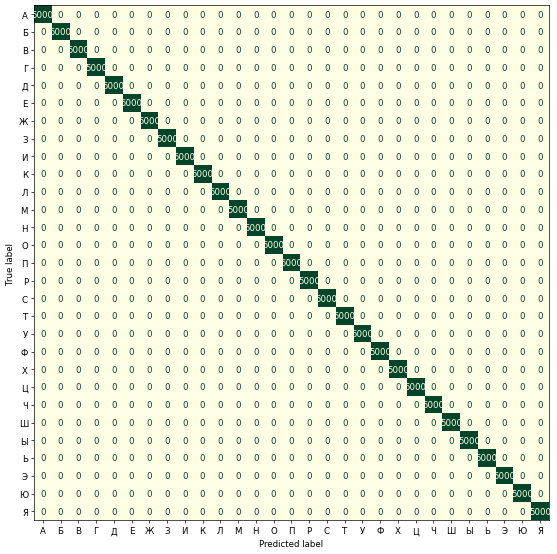

In [36]:
import matplotlib.pyplot as mpl

ax = mpl.figure(figsize=(11, 11), dpi=62, ).gca()

ALPH = ['А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ж', 'З', 'И', 'К', 'Л', 'М',
           'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Ы', 'Ь', 'Э', 'Ю', 'Я']

plot_confusion_matrix(model, X, Y, display_labels=ALPH, ax=ax, cmap='YlGn', colorbar=None)

In [37]:
classes = Y.nunique()
filename = f'lr_{classes}.sav'
pickle.dump(model, open(f'../models/{filename}', 'wb'))

In [38]:
# X, Y = x_test, y_test

# model.fit(x_train, y_train)
pred = model.predict(X)
# accuracy_score(y_test, pred)

In [39]:

error_idx = np.nonzero(Y.to_numpy() - pred)[0]
idx = Y.iloc[error_idx].index.values.astype(int)
mistakes = list(zip(idx, pred[error_idx].astype('int'), Y.to_numpy()[error_idx].astype('int')))

with open('wrong_predict.txt', 'w') as out:
    for line in mistakes:
        print(*line, file=out)